# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. It is intended as a starting point for exploring the data.

## Overview of the Dandiset

This notebook explores Dandiset [001366](https://dandiarchive.org/dandiset/001366/0.250324.1603), titled "Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification".

**Description from Dandiset:** movies of a pial vessel of mice used in the experiments.

**Citation:** Ranjan, Aditya; Wong, Devin T.; Huang, Qinwen; Ghanizada, Hashmat; Nedergaard, Maiken ; Kelley, Douglas H. ; Boster, Kimberly A. S. (2025) Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification (Version 0.250324.1603) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001366/0.250324.1603

## What this notebook covers

This notebook will guide you through:
1. Listing the required packages.
2. Loading the Dandiset metadata using the DANDI API.
3. Listing some assets within the Dandiset.
4. Selecting an NWB file from the Dandiset.
5. Loading and inspecting metadata from the selected NWB file.
6. Loading and visualizing imaging data (a frame from a movie) from the NWB file.
7. Summarizing the findings and suggesting potential next steps.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for reading NWB files)
- `h5py` (dependency for pynwb, for HDF5 file access)
- `remfile` (for streaming remote files)
- `matplotlib` (for plotting)
- `numpy` (for numerical operations)
- `seaborn` (for plot styling)

It is assumed that these packages are already installed in your Python environment.

## Loading the Dandiset using DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001366"
dandiset_version = "0.250324.1603"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # This URL points to the general dandiset, not version specific by default from API
print(f"Dandiset version-specific URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603
Dandiset version-specific URL: https://dandiarchive.org/dandiset/001366/0.250324.1603

First 5 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


## Loading an NWB file

We will now load one of the NWB files from the Dandiset to inspect its contents.

From the asset list above, we can see the available NWB files. Let's choose the first NWB file:
`sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb`

The asset ID for this file is `2f12bce3-f841-46ca-b928-044269122a59`.

We can construct the download URL for this asset as follows:
`https://api.dandiarchive.org/api/assets/&lt;ASSET_ID&gt;/download/`

So, the URL for our chosen file is:
`https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/`

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for plots (except images)
sns.set_theme()

# NWB file URL (hard-coded as per instructions based on tools_cli.py output)
nwb_file_url = "https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/"
nwb_asset_id = "2f12bce3-f841-46ca-b928-044269122a59" # For Neurosift link

print(f"Loading NWB file from: {nwb_file_url}")

# Load the NWB file
# This uses remfile to allow streaming access to the remote HDF5 file
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for pynwb as well
nwb = io.read()

print("\nNWB file loaded successfully.")
print(f"Session ID: {nwb.session_id}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/



NWB file loaded successfully.
Session ID: 03122024-m4-baseline
Session Start Time: 2024-03-12 01:00:00-04:00
Experimenter: ('Huang, Qinwen',)
Experiment Description: Vessel diameter and pulsatility measurement.
Subject ID: 031224_M4
Subject Species: Mus musculus


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Contents Summary

Here's a summary of some key information from the loaded NWB file:

- **Identifier:** `nwb.identifier` (Qinwen_6th_March_03122024-m4-baseline)
- **Session Description:** `nwb.session_description` (the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a hea...)
- **Keywords:** `nwb.keywords[:]` (['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis'])

#### Acquisition Data:
The file contains imaging data under `nwb.acquisition`. Let's list the available acquisition objects:

```
Available acquisition objects:
- Movies
```
(This is based on the `tools_cli.py nwb-file-info` output)

Specifically, there is an `ImageSeries` named `Movies`:
- **Path in NWB file:** `nwb.acquisition['Movies']`
- **Description:** `nwb.acquisition['Movies'].description` (16-bit grayscale movie of a pial vessel)
- **Data shape:** `nwb.acquisition['Movies'].data.shape` (e.g., (6000, 512, 512) for (time, height, width))
- **Data type:** `nwb.acquisition['Movies'].data.dtype` (e.g., uint16)
- **Sampling rate:** `nwb.acquisition['Movies'].rate` (e.g., 30.0 Hz)

### Explore this NWB file on Neurosift

You can explore the full structure and content of this NWB file interactively using Neurosift:

[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=draft)

(Note: The Neurosift link uses `dandisetVersion=draft` as per example, but the Dandiset version is `0.250324.1603`)

## Visualizing Data from the NWB File

We will now load and visualize a sample frame from the "Movies" `ImageSeries`.
The data is a 3D array (time, height, width). We'll select one frame (e.g., the first frame) to display.

Movies data shape: (6000, 512, 512)
Movies data type: uint16
Sampling rate: 30.0 Hz

Loading frame 0...


Successfully loaded frame of shape: (512, 512)


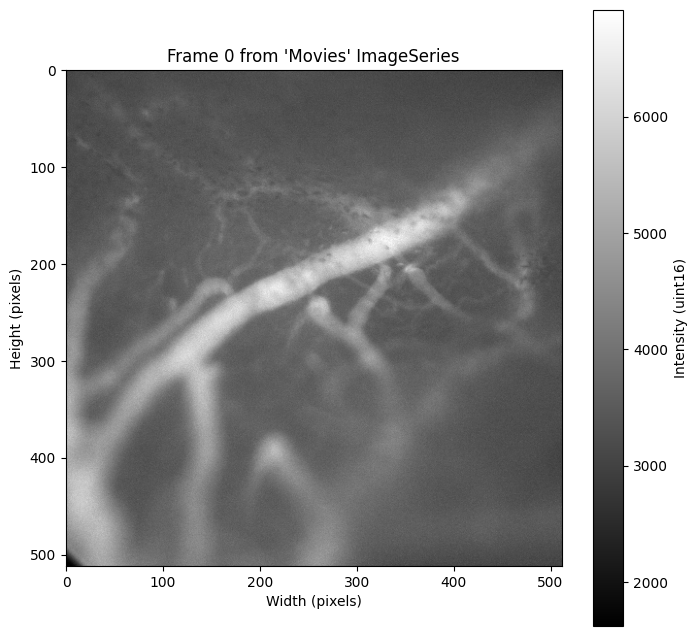

In [3]:
# Access the ImageSeries
movies_data = nwb.acquisition["Movies"].data

# Print some information about the movies data
print(f"Movies data shape: {movies_data.shape}") # (frames, height, width)
print(f"Movies data type: {movies_data.dtype}")
sampling_rate = nwb.acquisition["Movies"].rate
print(f"Sampling rate: {sampling_rate} Hz")

# Load a single frame (e.g., the first frame)
# IMPORTANT: Accessing data like this will download that part of the file.
# For large datasets, be mindful of how much data you load.
frame_index_to_load = 0
print(f"\nLoading frame {frame_index_to_load}...")
try:
    # Ensure we only load one frame
    single_frame = movies_data[frame_index_to_load, :, :]

    print(f"Successfully loaded frame of shape: {single_frame.shape}")

    # Visualize the frame
    # Do not use seaborn styling for images
    plt.style.use('default') # Reset to default matplotlib style for this plot
    plt.figure(figsize=(8, 8))
    plt.imshow(single_frame, cmap='gray')
    plt.title(f"Frame {frame_index_to_load} from 'Movies' ImageSeries")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.colorbar(label="Intensity (uint16)")
    plt.show()

except Exception as e:
    print(f"Error loading or plotting frame: {e}")
    print("This might happen due to network issues or if the data format isحةunexpected.")

The plot above shows a single frame from the microscopy movie. It's a grayscale image representing the intensity values captured by the microscope.

### Visualizing a Time Trace for a Pixel (Optional)

We can also look at how the intensity of a single pixel (or a small region) changes over time. Let's select a pixel and plot its time series.
Since the dataset contains 6000 frames, plotting the full time series might be too much. Let's plot for a short duration, e.g., the first 300 frames (10 seconds if rate is 30Hz).

Loading time series for pixel (256, 256) for the first 300 frames...


Successfully loaded time series of length: 300


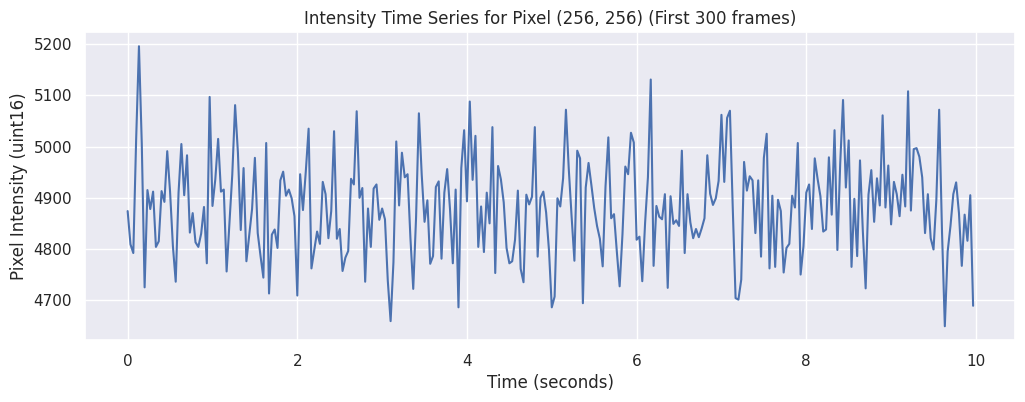

In [4]:
# Select a pixel (e.g., near the center)
pixel_y, pixel_x = 256, 256 # Example coordinates
num_frames_to_plot = 300 # Plot for first 300 frames

print(f"Loading time series for pixel ({pixel_y}, {pixel_x}) for the first {num_frames_to_plot} frames...")

try:
    # movies_data is (frames, height, width)
    pixel_time_series = movies_data[:num_frames_to_plot, pixel_y, pixel_x]
    
    # Create a time vector
    time_vector = np.arange(num_frames_to_plot) / sampling_rate

    print(f"Successfully loaded time series of length: {len(pixel_time_series)}")

    # Plot the time series
    sns.set_theme() # Re-apply seaborn theme for this plot
    plt.figure(figsize=(12, 4))
    plt.plot(time_vector, pixel_time_series)
    plt.title(f"Intensity Time Series for Pixel ({pixel_y}, {pixel_x}) (First {num_frames_to_plot} frames)")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Pixel Intensity (uint16)")
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error loading or plotting pixel time series: {e}")

## Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI Archive and retrieve metadata for Dandiset 001366.
- List assets within the Dandiset.
- Load a specific NWB file (`sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb`) by streaming its content from the web.
- Inspect basic metadata from the NWB file.
- Visualize a single frame from the `Movies` `ImageSeries` contained in the NWB file.
- Plot a short segment of the intensity time series for a single pixel.

### Potential Future Directions:

1.  **Detailed Vessel Analysis:** The Dandiset is focused on "Surface Vessel Diameter and Pulsatility Quantification". Researchers could apply image processing algorithms (like those mentioned in the keywords: Radon transform, FWHM) to the `Movies` data to:
    *   Segment blood vessels.
    *   Measure vessel diameter over time.
    *   Quantify vessel pulsatility.
2.  **Comparison across Subjects/Sessions:** If other NWB files in the Dandiset (e.g., `sub-F15/sub-F15_ses-F15BC-19102023_image.nwb`) contain similar data, comparative analyses could be performed.
3.  **Event-Related Analysis:** If the experimental paradigm involved specific stimuli or events, the imaging data could be analyzed in relation to these events (though no such event markers were explicitly noted from the basic metadata exploration here).
4.  **Advanced Visualization:** Create kymographs or other specialized visualizations to better understand spatio-temporal dynamics of vessel activity.

This notebook serves as a basic entry point. Deeper analysis would require more domain-specific knowledge and potentially more advanced computational tools.

Remember to close the HDF5 file and the remote file object if you are done with them and want to free up resources, although it's not strictly necessary for this exploratory notebook.
```python
# Optional: Close files
# io.close()
# h5_file.close()
# remote_file.close()
```

In [5]:
print("Notebook exploration complete.")

Notebook exploration complete.
